# Instructions
1. install required modules
2. set up path or upload data from input


In [ ]:
%pip install networkx
%pip install scipy

# preliminary data analysis
1. Data collection
2. Data Loading
3. Data Processing
4. EDA
5. Statistics

In [ ]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import os
import networkx as nx
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from networkx.algorithms.community.label_propagation import label_propagation_communities

In [ ]:
def downloadDataFiles():
    zipurl = 'http://www.casos.cs.cmu.edu/tools/datasets/external/drug_net/drug_net.xml.zip'
    with urlopen(zipurl) as zipresp:
        with ZipFile(BytesIO(zipresp.read())) as zfile:
            zfile.extractall('data')

In [ ]:
def constructNetwork():
    print("constructing networking")
    network = nx.Graph()
    tree = ET.parse('data//drug_net.xml')
    root = tree.getroot()

    for node in root.iter('node'):
        attributes = {}
        for attr in node.iter('property'):
            attributes[attr.attrib.get('name')] = attr.attrib.get('value')
        network.add_node(node.attrib.get('id'), gender=attributes.get('gender'), ethnicity=attributes.get('ethnicity'))

    for edge in root.iter('link'):
        network.add_edge(edge.attrib.get('source'), edge.attrib.get('target'))

    return network

constructing networking


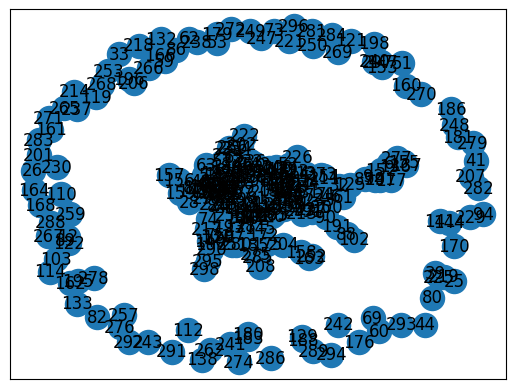

In [ ]:
downloadDataFiles()
network = constructNetwork()
nx.draw_networkx(network, with_labels=True)
plt.show()

In [ ]:
sorted(network.degree, key=lambda x: x[1], reverse=True)

[('50', 15),
 ('64', 11),
 ('30', 11),
 ('38', 10),
 ('55', 7),
 ('65', 7),
 ('58', 7),
 ('20', 6),
 ('22', 6),
 ('130', 6),
 ('173', 6),
 ('150', 6),
 ('134', 5),
 ('220', 5),
 ('18', 5),
 ('165', 5),
 ('31', 5),
 ('124', 5),
 ('87', 5),
 ('37', 5),
 ('212', 5),
 ('49', 5),
 ('127', 5),
 ('115', 5),
 ('68', 5),
 ('75', 5),
 ('209', 5),
 ('83', 5),
 ('97', 5),
 ('148', 5),
 ('151', 5),
 ('2', 4),
 ('10', 4),
 ('4', 4),
 ('8', 4),
 ('107', 4),
 ('117', 4),
 ('216', 4),
 ('19', 4),
 ('104', 4),
 ('23', 4),
 ('29', 4),
 ('35', 4),
 ('43', 4),
 ('108', 4),
 ('72', 4),
 ('113', 4),
 ('67', 4),
 ('66', 4),
 ('105', 4),
 ('171', 4),
 ('172', 4),
 ('185', 4),
 ('192', 4),
 ('193', 4),
 ('1', 3),
 ('3', 3),
 ('7', 3),
 ('152', 3),
 ('9', 3),
 ('14', 3),
 ('24', 3),
 ('52', 3),
 ('16', 3),
 ('79', 3),
 ('182', 3),
 ('32', 3),
 ('34', 3),
 ('189', 3),
 ('91', 3),
 ('54', 3),
 ('224', 3),
 ('85', 3),
 ('74', 3),
 ('78', 3),
 ('81', 3),
 ('84', 3),
 ('98', 3),
 ('90', 3),
 ('95', 3),
 ('93', 3),
 (

In [ ]:
communities = label_propagation_communities(network)
communities = sorted(communities, key=lambda x: x[1], reverse=True)
print([community for community in communities])

[{'43', '212', '34', '15', '209', '213', '215', '184', '233', '54', '38', '81', '98', '35', '37', '192', '42'}, {'83', '199', '190', '17', '79', '50', '70', '210', '47', '187', '165', '8', '64'}, {'148', '146', '171', '139', '150', '167', '287', '173'}, {'256', '254', '57', '189', '65', '231', '36'}, {'178', '1', '9', '145', '2', '10'}, {'7', '4', '273', '211', '154'}, {'200', '220', '223', '224', '11'}, {'104', '77', '105', '58', '78'}, {'87', '92', '177', '99', '101'}, {'67', '203', '115', '260', '255'}, {'217', '75', '197', '290', '74'}, {'127', '134', '63', '5'}, {'84', '107', '22', '228'}, {'135', '30', '93', '19'}, {'113', '149', '130', '123'}, {'46', '61', '72', '71'}, {'251', '97', '258', '280'}, {'120', '193', '140', '131'}, {'169', '174', '151', '194'}, {'3', '227', '244'}, {'152', '277', '6'}, {'89', '12', '122'}, {'14', '52', '226'}, {'124', '31', '24'}, {'66', '20', '40'}, {'95', '90', '91'}, {'45', '108', '116'}, {'245', '109', '49'}, {'156', '157', '85'}, {'68', '236', '

In [ ]:
nx.is_connected(network)

False

Graph is not connected thus center canculation is ignored.